In [29]:
import pandas as pd

df = pd.read_csv("../results.csv")
# strip column names
df.columns = [
    col.strip() for col in df.columns
]
df["player_1_won"] = df["player_1_won"] == "True"
df["player_2_won"] = ~df["player_1_won"]
df

,id,player_1_model,player_1_robot_type,player_1_temperature,player_2_model,player_2_robot_type,player_2_temperature,player_1_won,player_2_won
0,20241118172723,openai:gpt-4o,vision,0.7,openai:gpt-4o,vision,0.7,False,True
1,20241118172734,openai:gpt-4o,vision,0.7,openai:gpt-4o,vision,0.7,False,True
2,20241118172734,openai:gpt-4o,vision,0.7,openai:gpt-4o,vision,0.7,False,True
3,20241118172741,openai:gpt-4o,vision,0.7,openai:gpt-4o,vision,0.7,False,True
4,20241118172905,openai:gpt-4o,vision,0.7,mistral:pixtral-12b-2409,text,0.7,False,True
...,...,...,...,...,...,...,...,...,...
171,20241119100954,mistral:pixtral-large-latest,text,0.7,anthropic:claude-3-haiku-20240307,text,0.7,False,True
172,20241119101036,mistral:pixtral-large-latest,vision,0.7,openai:gpt-4o,vision,0.7,False,True
173,20241119101135,mistral:pixtral-large-latest,text,0.7,openai:gpt-4o,vision,0.7,False,True
174,20241119101142,mistral:pixtral-large-latest,text,0.7,openai:gpt-4o,vision,0.7,False,True


In [30]:
df["player_1_won"].value_counts()

player_1_won
False    176
Name: count, dtype: int64

In [31]:
# Compute the number of wins for each model 

unique_models = df["player_1_model"].unique().tolist()
unique_models += df["player_2_model"].unique().tolist()
unique_models = list(set(unique_models))

# For each model, compute the number of wins (player_1 won if it's player 1), the number of games played and the win rate
results = []
for model in unique_models:
    games_played = 0
    wins = 0
    for i, row in df.iterrows():
        if row["player_1_model"] == model and row["player_2_model"] != model:
            games_played += 1
            if row["player_1_won"]:
                wins += 1
            continue
        if row["player_2_model"] == model and row["player_1_model"] != model:
            games_played += 1
            if row["player_2_won"]:
                wins += 1
            continue
    win_rate = wins / games_played
    results.append({
        "model": model,
        "games_won": wins,
        "games_played": games_played,
        "win_rate": win_rate
    })

# Cast to df 
results_df = pd.DataFrame(results)
results_df.sort_values(by="win_rate", ascending=False, inplace=True)
results_df = results_df[results_df["games_played"] > 1]
results_df

,model,games_won,games_played,win_rate
0,openai:gpt-4o-mini,41,48,0.854167
1,mistral:pixtral-12b-2409,41,65,0.630769
3,anthropic:claude-3-haiku-20240307,20,39,0.512821
4,openai:gpt-4o,23,76,0.302632
2,mistral:pixtral-large-latest,0,22,0.000000


In [27]:
print(results_df.to_markdown())

|    | model                             |   games_won |   games_played |   win_rate |
|---:|:----------------------------------|------------:|---------------:|-----------:|
|  0 | openai:gpt-4o-mini                |          41 |             48 |   0.854167 |
|  1 | mistral:pixtral-12b-2409          |          41 |             65 |   0.630769 |
|  3 | anthropic:claude-3-haiku-20240307 |          20 |             39 |   0.512821 |
|  4 | openai:gpt-4o                     |          23 |             76 |   0.302632 |
|  2 | mistral:pixtral-large-latest      |           0 |             22 |   0        |


In [32]:
results = []

for model_1 in unique_models:
    for model_2 in unique_models:
        games_played = 0
        wins = 0
        for i, row in df.iterrows():
            if row["player_1_model"] == model_1 and row["player_2_model"] == model_2 and model_1 != model_2:
                games_played += 1
                if row["player_1_won"]:
                    wins += 1
                continue
            if row["player_2_model"] == model_1 and row["player_1_model"] == model_2 and model_1 != model_2:
                games_played += 1
                if row["player_2_won"]:
                    wins += 1
                continue
        try:
            win_rate = wins / games_played
        except:
            win_rate = 0
        results.append({
            "model_1": model_1,
            "model_2": model_2,
            "games_won": wins,
            "games_played": games_played,
            "win_rate": win_rate
        })
results_df = pd.DataFrame(results)
results_df = results_df[results_df["games_played"] > 1]
results_df

,model_1,model_2,games_won,games_played,win_rate
1,openai:gpt-4o-mini,mistral:pixtral-12b-2409,9,11,0.818182
2,openai:gpt-4o-mini,mistral:pixtral-large-latest,3,3,1.000000
3,openai:gpt-4o-mini,anthropic:claude-3-haiku-20240307,5,8,0.625000
4,openai:gpt-4o-mini,openai:gpt-4o,24,26,0.923077
5,mistral:pixtral-12b-2409,openai:gpt-4o-mini,2,11,0.181818
7,mistral:pixtral-12b-2409,mistral:pixtral-large-latest,6,6,1.000000
8,mistral:pixtral-12b-2409,anthropic:claude-3-haiku-20240307,8,14,0.571429
9,mistral:pixtral-12b-2409,openai:gpt-4o,25,34,0.735294
10,mistral:pixtral-large-latest,openai:gpt-4o-mini,0,3,0.000000
11,mistral:pixtral-large-latest,mistral:pixtral-12b-2409,0,6,0.000000


In [34]:
# Display results df in a matrix

results_matrix = results_df.pivot(index="model_1", columns="model_2", values="win_rate")
results_matrix


model_2,anthropic:claude-3-haiku-20240307,mistral:pixtral-12b-2409,mistral:pixtral-large-latest,openai:gpt-4o,openai:gpt-4o-mini
model_1,,,,,
anthropic:claude-3-haiku-20240307,NaN,0.428571,1.0,0.400000,0.375000
mistral:pixtral-12b-2409,0.571429,NaN,1.0,0.735294,0.181818
mistral:pixtral-large-latest,0.000000,0.000000,NaN,0.000000,0.000000
openai:gpt-4o,0.600000,0.264706,1.0,NaN,0.076923
openai:gpt-4o-mini,0.625000,0.818182,1.0,0.923077,NaN


In [35]:
print(results_matrix.to_markdown())

| model_1                           |   anthropic:claude-3-haiku-20240307 |   mistral:pixtral-12b-2409 |   mistral:pixtral-large-latest |   openai:gpt-4o |   openai:gpt-4o-mini |
|:----------------------------------|------------------------------------:|---------------------------:|-------------------------------:|----------------:|---------------------:|
| anthropic:claude-3-haiku-20240307 |                          nan        |                   0.428571 |                              1 |        0.4      |            0.375     |
| mistral:pixtral-12b-2409          |                            0.571429 |                 nan        |                              1 |        0.735294 |            0.181818  |
| mistral:pixtral-large-latest      |                            0        |                   0        |                            nan |        0        |            0         |
| openai:gpt-4o                     |                            0.6      |                   0.264706 | 

In [37]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


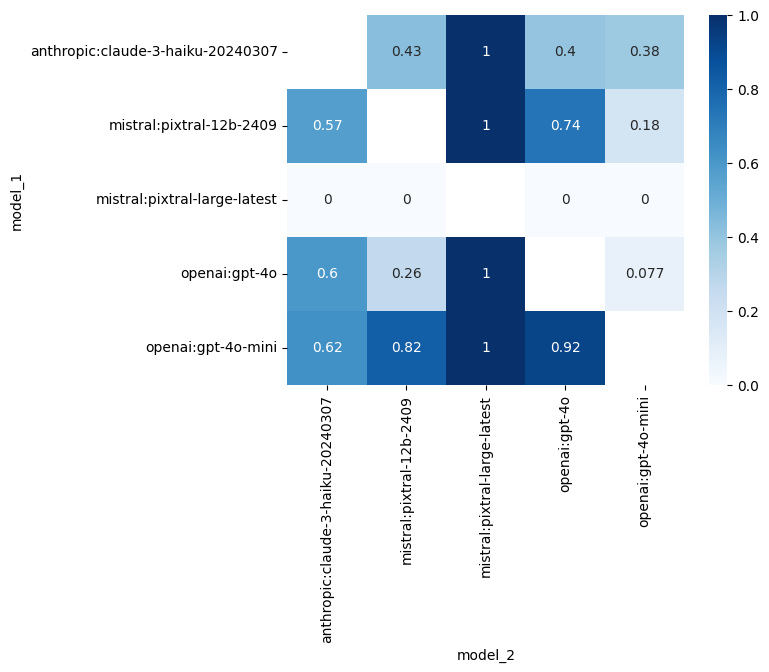

In [38]:
# Make a heatmap
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(results_matrix, annot=True, 
            # cmap from white to blue
            cmap="Blues",
            )
# plt.xticks(rotation=-45)

plt.show()